# PROBLEM STATEMENT:


The objective of this study is to perform an exploratory data analysis (EDA) on a dataset containing information about data science professionals' salaries and work characteristics from the years 2020 to 2022. The dataset includes variables such as job titles, years of experience, employment status, salary in rupees, remote working ratio, company location, and company size.

The main goals of this analysis are to:

Explore the distribution of salaries among data science professionals over the years 2020 to 2022 and identify any trends or patterns.
Investigate the relationship between salary and other variables such as job title, years of experience, employment status, remote working ratio, company location, and company size.
Analyze the distribution of remote working ratios among employees and explore potential correlations with other variables such as salary or job title.
Examine how remote working ratios vary across different company locations and identify any geographical trends.
By addressing these objectives, we aim to gain insights into the factors influencing data science professionals' salaries and remote working behaviors, which can inform organizational decision-making and human resource management strategies.



i start off by importing pandas for data manipulation and analysis..importing matplotlib and seaborn for visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticke
import seaborn as sns
import plotly as px

i am loading the dataset int pandas

In [2]:
df = pd.read_csv("Data_Science_Fields_Salary_Categorization.csv")
 #Converting the salary column to numeric
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].str.replace(',', '').astype(float)


In [27]:
df = pd.read_csv("Data_Science_Fields_Salary_Categorization.csv")
# Converting the salary column to strings, remove commas, and then convert to numeric
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].astype(str).str.replace(',', '', regex=True)
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

In [ ]:
# Exploring basic information about the DataFrame:
print(df.head())


   Unnamed: 0  Working_Year                 Designation Experience  \
0           1          2020              Data Scientist         MI   
1           2          2020  Machine Learning Scientist         SE   
2           3          2020           Big Data Engineer         SE   
3           4          2020        Product Data Analyst         MI   
4           5          2020   Machine Learning Engineer         SE   

  Employment_Status  Salary_In_Rupees Employee_Location Company_Location  \
0                FT         6352272.0                DE               DE   
1                FT        20688070.0                JP               JP   
2                FT         8674985.0                GB               GB   
3                FT         1591390.0                HN               HN   
4                FT        11935425.0                US               US   

  Company_Size  Remote_Working_Ratio  
0            L                     0  
1            S                     0  
2    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   Working_Year          607 non-null    int64 
 2   Designation           607 non-null    object
 3   Experience            607 non-null    object
 4   Employment_Status     607 non-null    object
 5   Salary_In_Rupees      607 non-null    object
 6   Employee_Location     607 non-null    object
 7   Company_Location      607 non-null    object
 8   Company_Size          607 non-null    object
 9   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,Working_Year,Remote_Working_Ratio
count,607.000000,607.000000,607.00000
mean,304.000000,2021.405272,70.92257
std,175.370085,0.692133,40.70913
min,1.000000,2020.000000,0.00000
25%,152.500000,2021.000000,50.00000
50%,304.000000,2022.000000,100.00000
75%,455.500000,2022.000000,100.00000
max,607.000000,2022.000000,100.00000


In [ ]:
df.isnull().sum()     # double checking if i have missing values lol

Unnamed: 0              0
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Salary_In_Rupees        0
Employee_Location       0
Company_Location        0
Company_Size            0
Remote_Working_Ratio    0
dtype: int64

# VISUALIZING DATA

In [21]:
# counting the numbers of employees for each job title represented in the dataset

job_titles = df.Designation.value_counts().head(10)
job_titles

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: Designation, dtype: int64

here i am visualizing the number of employees for each job title

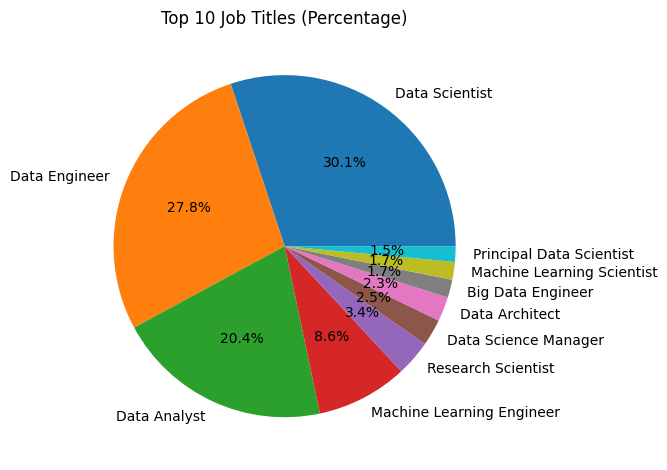

In [28]:

job_titles = df['Designation'].value_counts().head(10)

# Creating a pie chart
plt.pie(job_titles.values, labels=job_titles.index, autopct="%1.1f%%") ## Show % on each slice with 1 decimal place
plt.title('Top 10 Job Titles (Percentage)')
plt.tight_layout() #this line automatically adjusts the spacing between the pie chart and its elements (title, labels) for better visual presentation.
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0', 'Working_Year', 'Designation', 'Experience',
       'Employment_Status', 'Salary_In_Rupees', 'Employee_Location',
       'Company_Location', 'Company_Size', 'Remote_Working_Ratio'],
      dtype='object')

distributing the first 10 jobs with their salaries

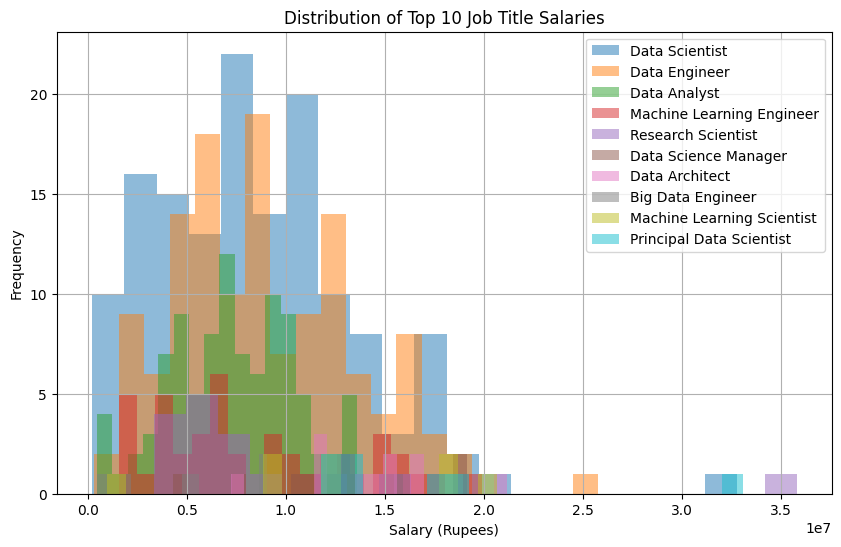

In [ ]:
top_10_job_titles = df['Designation'].value_counts().head(10).index
top_10_data = df[df['Designation'].isin(top_10_job_titles)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
for job_title in top_10_job_titles:
    job_data = top_10_data[top_10_data['Designation'] == job_title]['Salary_In_Rupees']
    plt.hist(job_data, bins=20, alpha=0.5, label=job_title)

plt.title('Distribution of Top 10 Job Title Salaries')
plt.xlabel('Salary (Rupees)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

we didnt get much on that diagram so we are trying it again

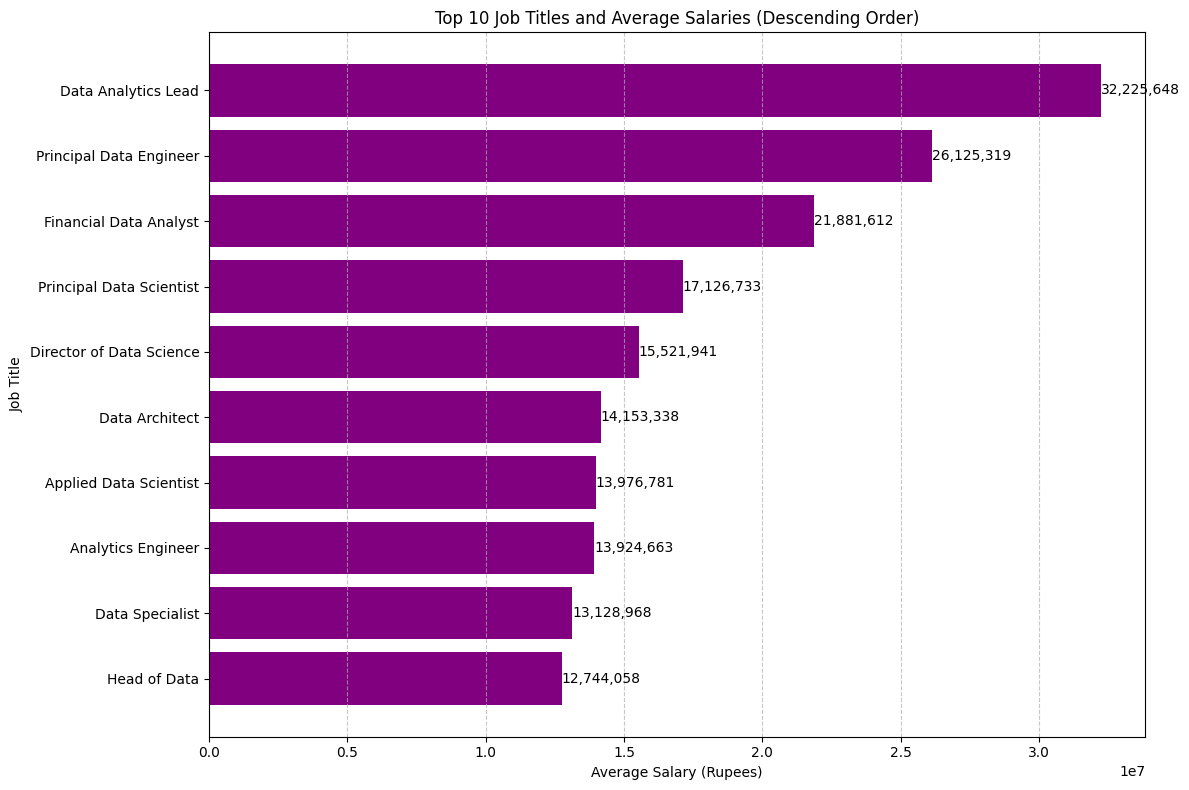

In [29]:
# Verifing and ensuring the salary column is numeric
try:
    df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')
except ValueError as e:
    print("Error converting salary values:", e)
    # Handle errors gracefully, e.g., by filling missing values or excluding rows

# Sorting by salary in descending order and identify top 10 job titles
top_10_salaries = df.groupby('Designation')['Salary_In_Rupees'].mean().sort_values(ascending=False).head(10)

# Getting job titles and corresponding average salaries
top_10_job_titles = top_10_salaries.index.to_list()
top_10_avg_salaries = top_10_salaries.values  # Using .values to get the actual salary figures as a numpy array

# Creating a clear and informative bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_job_titles, top_10_avg_salaries, color='#800080')  # Dark purple bars
plt.xlabel('Average Salary (Rupees)')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles and Average Salaries (Descending Order)')

# Adding exact salary figures on the bars
for index, value in enumerate(top_10_avg_salaries):
    plt.text(value, index, f'{value:,.0f}', ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Arranging bars in descending order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


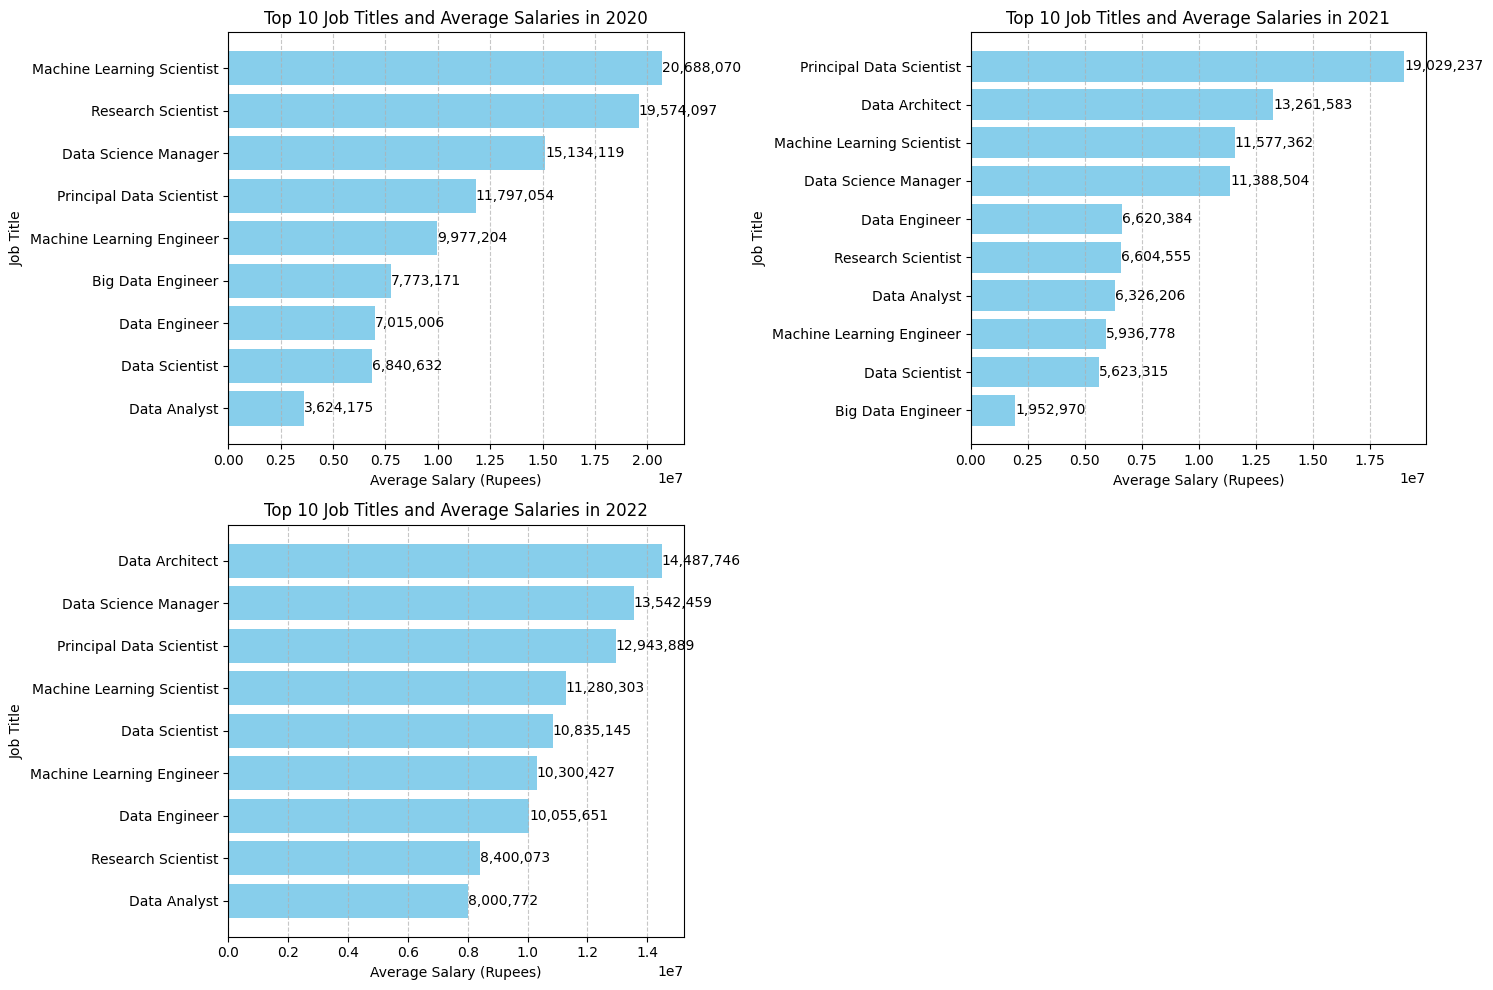

In [32]:
# Converting the salary column to numeric
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

# Identifying the top 10 job titles based on the entire dataset
top_10_job_titles_all = df['Designation'].value_counts().nlargest(10).index

# Filtering the data for each year and identifying the top 10 job titles
years = [2020, 2021, 2022]

plt.figure(figsize=(15, 10))

for i, year_val in enumerate(years, 1):
    plt.subplot(2, 2, i)
    year_data = df[df['Working_Year'] == year_val]
    top_10_salaries = year_data[year_data['Designation'].isin(top_10_job_titles_all)].groupby('Designation')['Salary_In_Rupees'].mean().nlargest(10)

    # Getting job titles and corresponding average salaries
    top_10_job_titles = top_10_salaries.index.to_list()
    top_10_avg_salaries = top_10_salaries.values

    # Plotting the bar chart
    plt.barh(top_10_job_titles, top_10_avg_salaries, color='skyblue')
    plt.xlabel('Average Salary (Rupees)')
    plt.ylabel('Job Title')
    plt.title(f'Top 10 Job Titles and Average Salaries in {year_val}')

    # Adding exact salary figures on the bars
    for index, value in enumerate(top_10_avg_salaries):
        plt.text(value, index, f'{value:,.0f}', ha='left', va='center', fontsize=10)

    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#plt.gca().invert_yaxis(): This line of code accesses the current Axes object (plt.gca()) and calls the invert_yaxis() method on it. In Matplotlib, the y-axis is typically inverted in horizontal bar charts, so that the top of the plot corresponds to the first item in the dataset.
#By calling invert_yaxis(), we reverse the order of the y-axis so that the top of the plot corresponds to the last item in the dataset, which is a common convention for displaying data in descending order.
#plt.grid(axis='x', linestyle='--', alpha=0.7): This line of code adds gridlines to the plot along the x-axis. It sets the gridline style to dashed (linestyle='--') and adjusts the transparency of the gridlines to 70% (alpha=0.7). Gridlines are useful for visually aligning data points and assisting in reading values off the plot.


Question: How does the average salary for the top 10 job titles in the field of data science vary across different years (2020, 2021, and 2022)?

Question: How does the salary vary with years of experience among data science professionals?

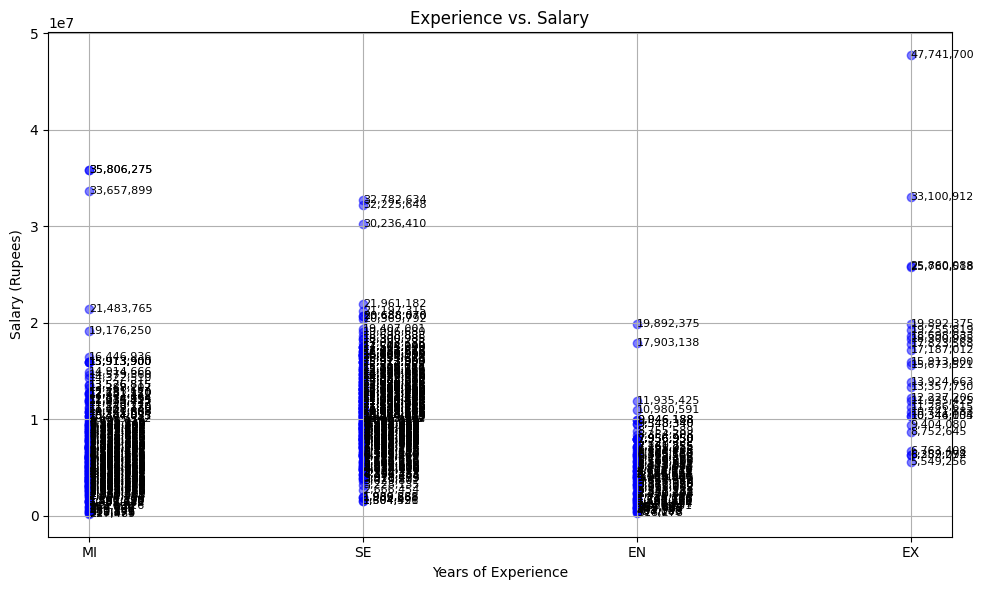

In [ ]:
# Converting the salary column to numeric
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience'], df['Salary_In_Rupees'], color='blue', alpha=0.5)

# Adding exact salary figures as text annotations on the plot
for x, y, salary in zip(df['Experience'], df['Salary_In_Rupees'], df['Salary_In_Rupees']):
    plt.text(x, y, f'{salary:,.0f}', ha='left', va='center', fontsize=8)

plt.title('Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Rupees)')
plt.grid(True)
plt.tight_layout()
plt.show()


Question: Which countries have the highest number of data science employees, and what are the average salaries of data science employees in these countries?






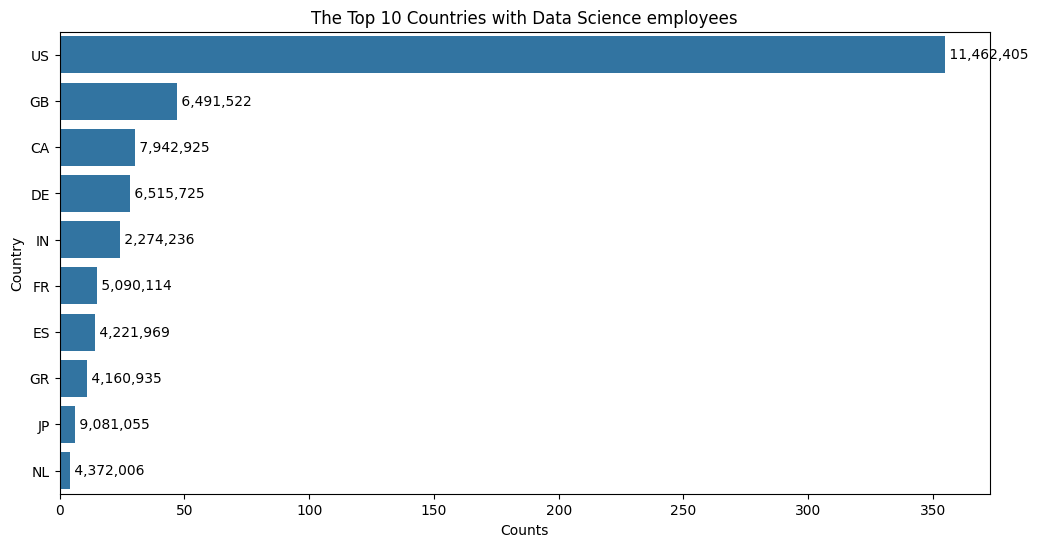

In [ ]:
# Converting the salary column to numeric
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

# top 10 countries with the highest number of employees
countries = df['Company_Location'].value_counts().head(10)

plt.figure(figsize=(12,6))

# Plotting the bar plot
ax = sns.barplot(y=countries.index, x=countries.values)

# Adding exact salary figures as text annotations on the bars
for i, country in enumerate(countries.index):
    salary = df[df['Company_Location'] == country]['Salary_In_Rupees'].mean()  # Calculating the average salary for each country
    ax.text(countries.values[i], i, f' {salary:,.0f} ', ha='left', va='center', color='black', fontsize=10)

plt.xticks(rotation=0)
plt.title("The Top 10 Countries with Data Science employees")
plt.ylabel('Country')
plt.xlabel('Counts')

plt.show()


In [ ]:
 df.columns

Index(['Unnamed: 0', 'Working_Year', 'Designation', 'Experience',
       'Employment_Status', 'Salary_In_Rupees', 'Employee_Location',
       'Company_Location', 'Company_Size', 'Remote_Working_Ratio'],
      dtype='object')

company size vs salary...question..Does comapny size have an effect on the salaries employees get?

<ipython-input-33-dbb05b1b4cf3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_salary_by_company_size.index, y=avg_salary_by_company_size.values, palette='viridis')


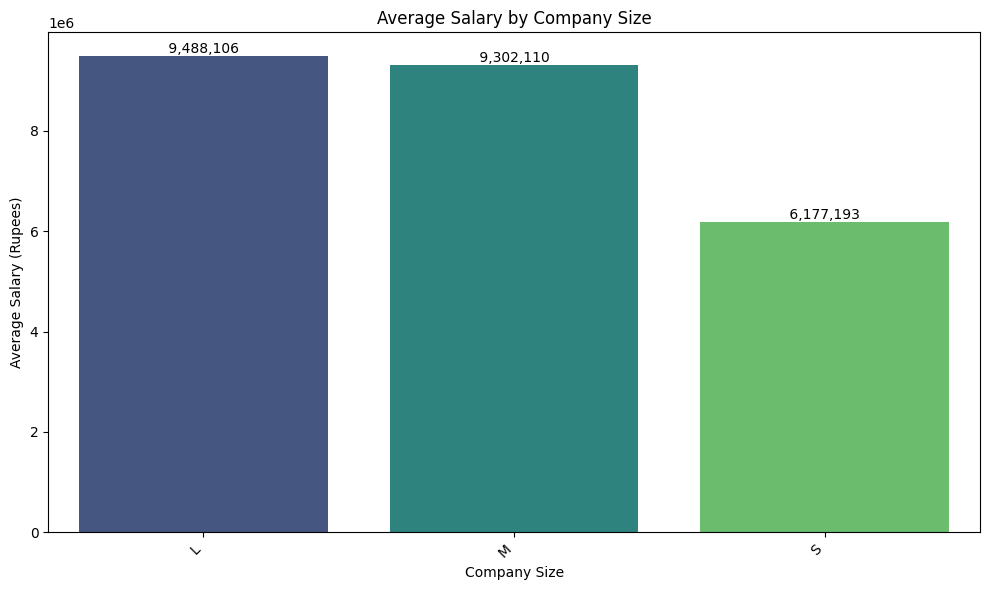

In [33]:
# Converting the salary column to numeric
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

# Grouping the data by company size and calculating the average salary
avg_salary_by_company_size = df.groupby('Company_Size')['Salary_In_Rupees'].mean().sort_values(ascending=False)

# Plotting the average salary by company size
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_salary_by_company_size.index, y=avg_salary_by_company_size.values, palette='viridis')

# Adding exact salary figures as text annotations on the bars
for i, salary in enumerate(avg_salary_by_company_size.values):
    ax.text(i, salary, f' {salary:,.0f} ', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (Rupees)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


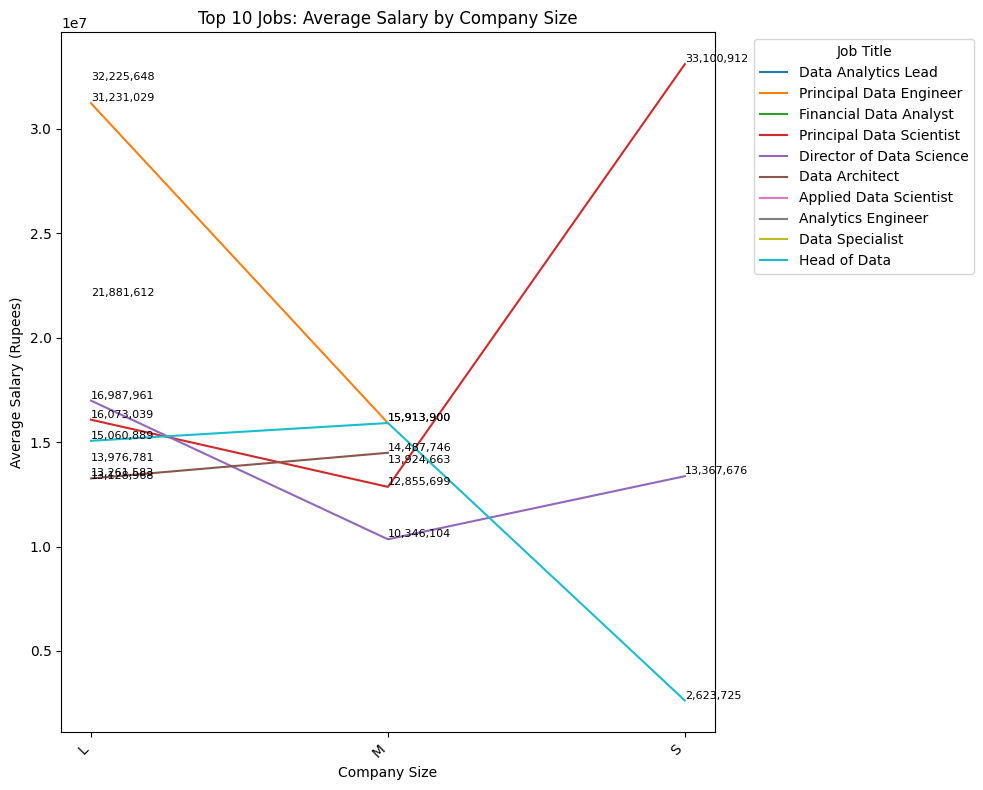

In [3]:
# Converting the salary column to numeric
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'], errors='coerce')

# Grouping the data by both 'Designation' and 'Company_Size' columns and calculating the average salary
avg_salary_by_job_and_company_size = df.groupby(['Designation', 'Company_Size'])['Salary_In_Rupees'].mean().unstack()

# Identifying the top 10 jobs based on overall average salary
top_10_jobs = df.groupby('Designation')['Salary_In_Rupees'].mean().nlargest(10).index

# Selecting data for the top 10 jobs and plotting the average salary by company size
plt.figure(figsize=(10, 8))
for job in top_10_jobs:
    sns.lineplot(x=avg_salary_by_job_and_company_size.columns, y=avg_salary_by_job_and_company_size.loc[job], label=job)

# Adding exact salary figures as text annotations on the plot
for job in top_10_jobs:
    for company_size, salary in avg_salary_by_job_and_company_size.loc[job].items():
        plt.text(company_size, salary, f'{salary:,.0f}', ha='left', va='bottom', color='black', fontsize=8)

plt.title('Top 10 Jobs: Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (Rupees)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question: How does the distribution of remote working ratios vary among employees, and is there any correlation between remote working ratios, job titles, and salary levels?

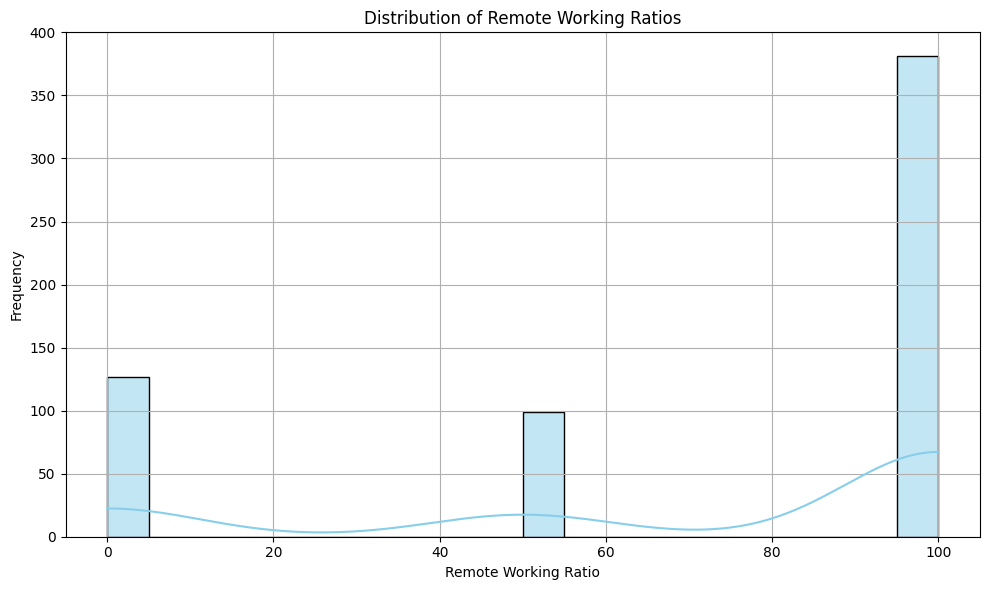

In [39]:
# Convertting the remote working ratio column to numeric
df['Remote_Working_Ratio'] = pd.to_numeric(df['Remote_Working_Ratio'], errors='coerce')

# 1. Exploring the distribution of remote working ratios
plt.figure(figsize=(10, 6))
sns.histplot(df['Remote_Working_Ratio'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Remote Working Ratios')
plt.xlabel('Remote Working Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation: This histogram shows the distribution of remote working ratios among employees.
# It indicates how common different levels of remote work are within the organization.



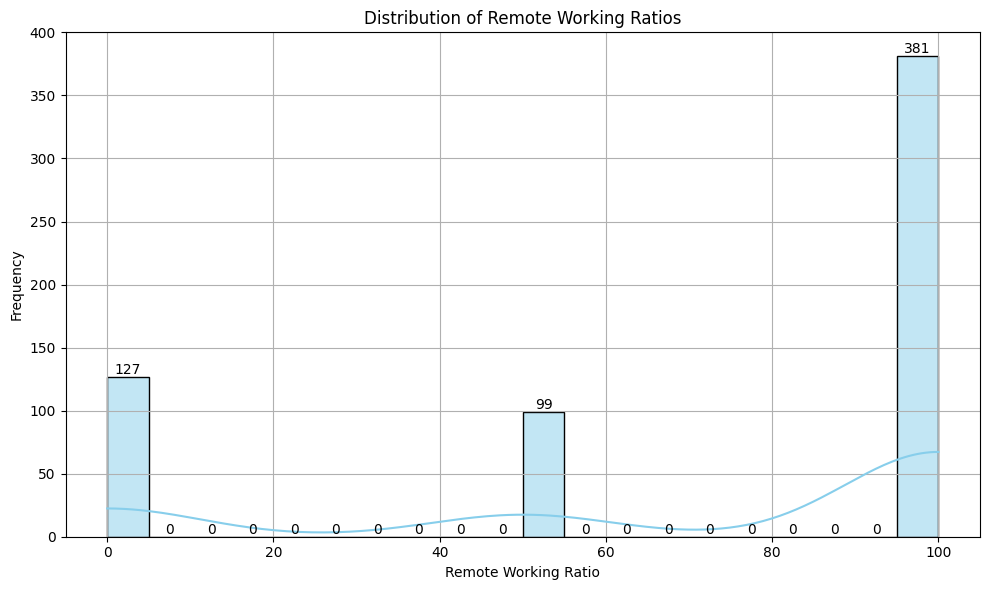

In [6]:
# Converting the remote working ratio column to numeric
df['Remote_Working_Ratio'] = pd.to_numeric(df['Remote_Working_Ratio'], errors='coerce')

# 1. Exploring the distribution of remote working ratios
plt.figure(figsize=(10, 6))
sns.histplot(df['Remote_Working_Ratio'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Remote Working Ratios')
plt.xlabel('Remote Working Ratio')
plt.ylabel('Frequency')

# Adding exact frequency figures as text annotations on the bars
for rect in plt.gca().patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-35-34fb86bfe82c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Designation', y='Remote_Working_Ratio', data=df, palette='viridis')


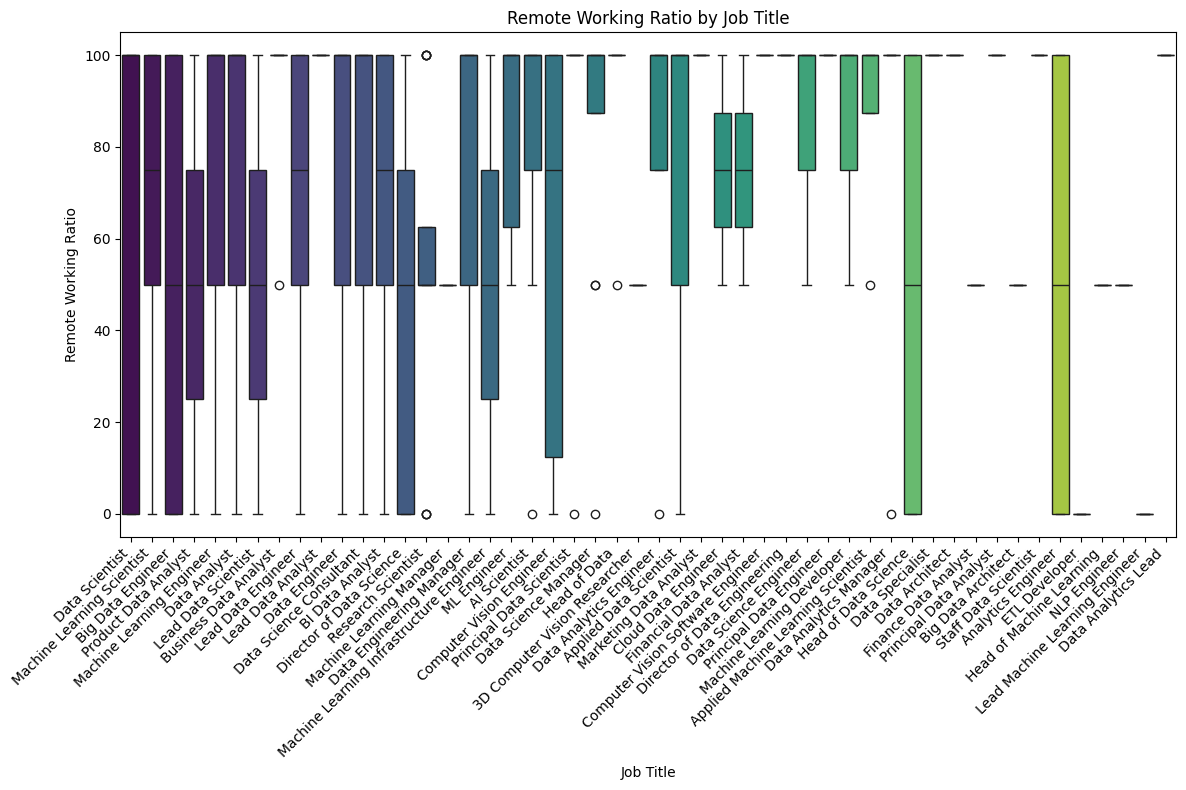

In [35]:
# 2. Investigating whether remote working ratios vary based on job title
plt.figure(figsize=(12, 8))
sns.boxplot(x='Designation', y='Remote_Working_Ratio', data=df, palette='viridis')
plt.title('Remote Working Ratio by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Remote Working Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation: This box plot illustrates the variation in remote working ratios across different job titles.
# It helps to identify if there are any differences in remote work tendencies among employees with different roles.

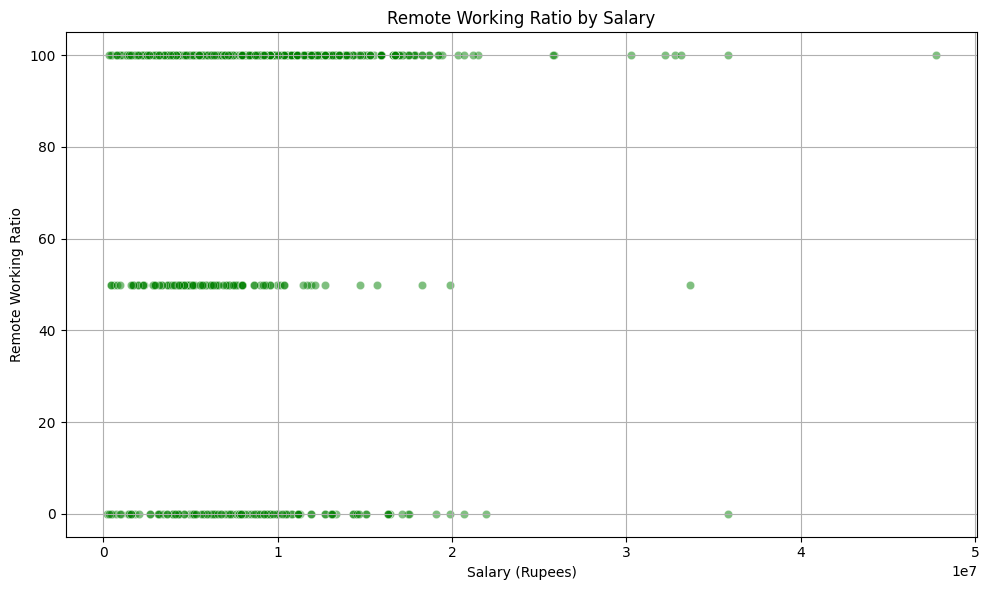

In [36]:
# 3. Exploring the relationship between remote working ratios and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary_In_Rupees', y='Remote_Working_Ratio', data=df, color='green', alpha=0.5)
plt.title('Remote Working Ratio by Salary')
plt.xlabel('Salary (Rupees)')
plt.ylabel('Remote Working Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation: This scatter plot examines the relationship between salary and remote working ratio.
# It aims to determine if there is any correlation between salary level and propensity for remote work.
